# Gym Customer Churn Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("gym churn data.csv")
df.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2364,0,1,0,0,1,1,0,29,311.187187,1.0,1,1.991406,1.984092,0
1751,0,1,1,0,1,12,0,28,232.990908,4.0,14,3.964821,3.957143,0
2404,1,1,0,0,1,1,0,31,207.943217,1.0,2,1.286554,1.120477,0
2746,0,1,1,1,1,12,1,28,304.031199,12.0,4,3.777030,3.774651,0
2222,1,1,1,1,1,12,0,29,59.041552,12.0,3,2.482598,2.452209,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.iloc[:,[7,8,11,12]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
Avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783


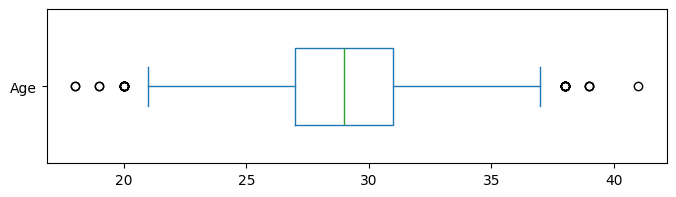

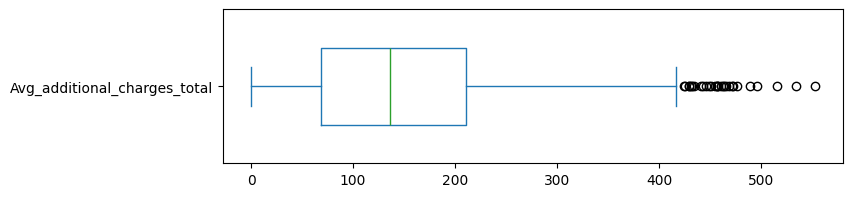

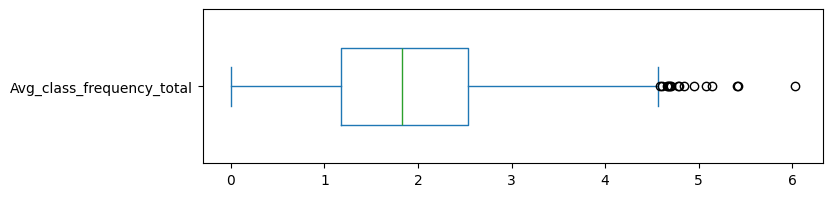

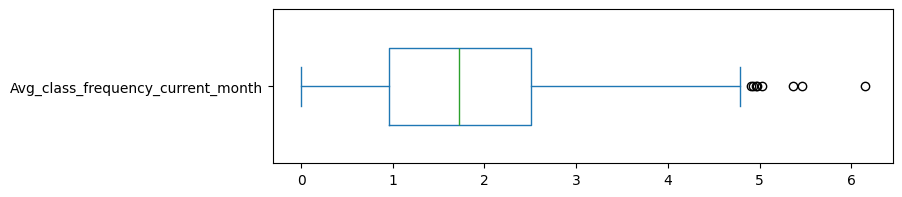

In [5]:
for i in [7,8,11,12]:
    df.iloc[:,i].plot.box(vert=False,figsize=(8,2),widths=0.5)
    plt.show()

In [6]:
df.corr()["Churn"]

gender                               0.000708
Near_Location                       -0.128098
Partner                             -0.157986
Promo_friends                       -0.162233
Phone                               -0.001177
Contract_period                     -0.389984
Group_visits                        -0.175325
Age                                 -0.404735
Avg_additional_charges_total        -0.198697
Month_to_end_contract               -0.381393
Lifetime                            -0.438220
Avg_class_frequency_total           -0.249715
Avg_class_frequency_current_month   -0.412348
Churn                                1.000000
Name: Churn, dtype: float64

In [7]:
df.drop(["gender","Phone"],axis=1,inplace=True)

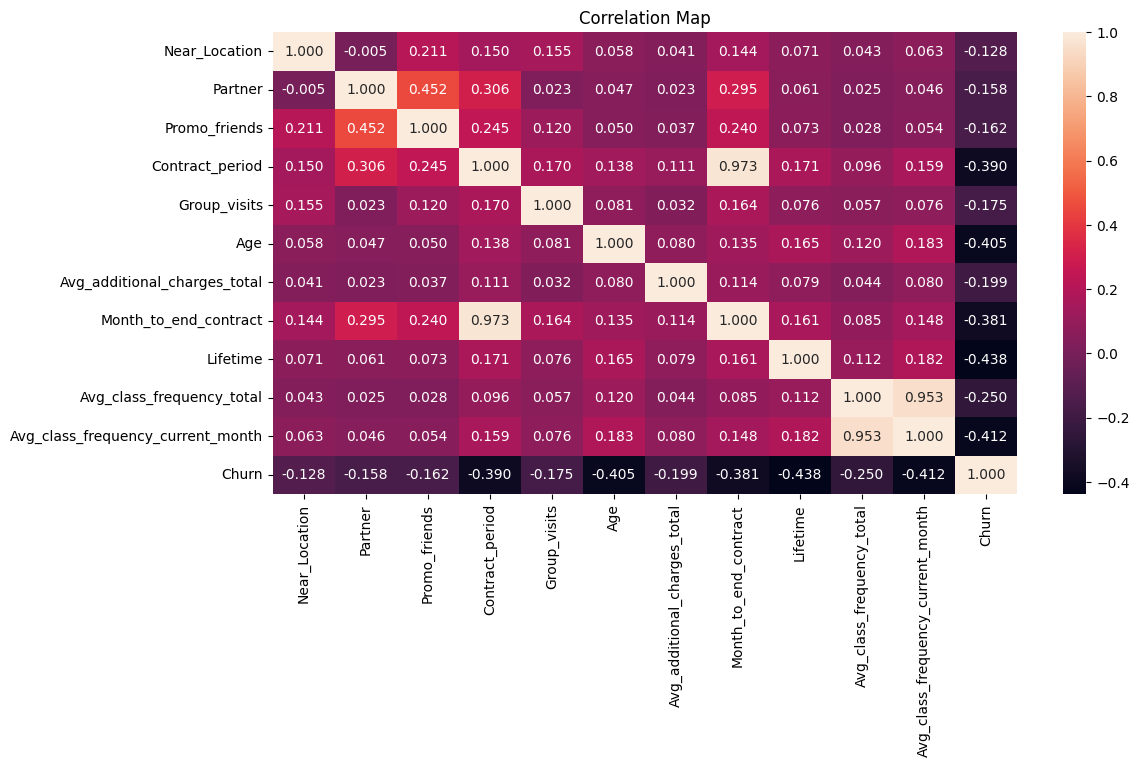

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt=".3f")
plt.title("Correlation Map")
plt.show()

In [9]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

In [10]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y, train_size=0.7,random_state=43)

In [11]:
scalar = StandardScaler()

In [12]:
X_tr.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
220,1,1,1,1,0,31,259.244902,1.0,3,1.778478,1.621739
2504,1,0,0,6,1,36,198.189377,5.0,3,3.697441,3.880265
2167,1,1,0,1,0,28,96.370420,1.0,2,0.078059,0.000000
1043,1,0,0,12,1,33,275.025084,11.0,4,0.402946,0.508431
3038,1,0,0,1,0,30,311.915088,1.0,3,1.576665,1.626643


In [13]:
X_tr.iloc[:,[3,5,6,7,9,10]] = scalar.fit_transform(X_tr.iloc[:,[3,5,6,7,9,10]])

In [14]:
X_tr.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
220,1,1,1,-0.816315,0,0.541604,1.157550,-0.798825,3,-0.108084,-0.143199
2504,1,0,0,0.277836,1,2.061743,0.524119,0.149335,3,1.877192,2.010947
2167,1,1,0,-0.816315,0,-0.370480,-0.532220,-0.798825,2,-1.867264,-1.689988
1043,1,0,0,1.590817,1,1.149660,1.321264,1.571576,4,-1.531150,-1.205054
3038,1,0,0,-0.816315,0,0.237576,1.703986,-0.798825,3,-0.316871,-0.138521


In [15]:
X_te.iloc[:,[3,5,6,7,9,10]] = scalar.transform(X_te.iloc[:,[3,5,6,7,9,10]])

In [16]:
X_te.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
376,1,0,0,-0.816315,1,-3.106730,0.157726,-0.798825,0,-1.092382,-1.460727
777,0,1,0,-0.816315,1,-1.282563,0.675169,-0.798825,3,0.124654,0.111244
2012,0,0,0,-0.816315,0,-0.674507,-1.479504,-0.798825,1,0.132511,-1.542845
309,1,1,0,0.277836,0,1.149660,-0.736339,-0.087705,7,1.660161,1.596202
3276,1,1,1,0.277836,1,-0.066452,-1.397136,0.386375,1,0.022860,0.270961


In [17]:
model = KNeighborsClassifier(n_neighbors=11,n_jobs=-1)

The KNeighborsClassifier class from scikit-learn is used to implement the K-Nearest Neighbors (KNN) algorithm for classification tasks. Your snippet initializes the classifier with the following parameters:

> Understanding the Parameters
* n_neighbors=11:
    * Specifies the number of neighbors (𝐾) to consider when making predictions.
    * In this case, the classifier will look at the 11 nearest neighbors to determine the majority class for classification.
* n_jobs=-1:
    * This enables parallel processing to speed up the computation.
    * Setting it to -1 allows the algorithm to use all available CPU cores for distance calculations.

> Additional Notes
* Choosing 𝐾:
    * Experiment with different values of 𝐾 using cross-validation to find the best value for your dataset.
* Feature Scaling:
    * Standardization or normalization is crucial for KNN since it relies on distance calculations, and features with larger scales can dominate.
* Efficiency with n_jobs:
    * Parallel processing makes KNN more efficient for large datasets.
* Additional Hyperparameters:
    * weights: Use 'uniform' (default) for equal weighting or 'distance' to weigh neighbors by their proximity.
    * metric: Default is 'minkowski', which computes the Euclidean distance. You can use other metrics like 'manhattan'.

In [18]:
model.fit(X_tr,y_tr)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [19]:
model.score(X_tr,y_tr)

0.9228571428571428

In [20]:
y_pred = model.predict(X_te)

In [21]:
accuracy_score(y_te,y_pred)

0.9116666666666666

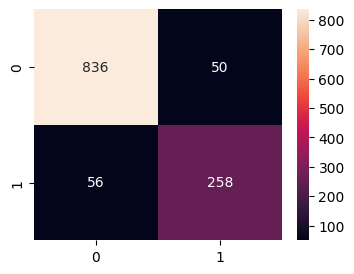

In [22]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_te,y_pred),annot=True, fmt="d")
plt.show()

In [23]:
gscv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid={"n_neighbors": 
                                                                [5,7,9,11,13,15,17,19,21,23,25,27]},verbose=True,cv=10,n_jobs=-1)

The GridSearchCV class in scikit-learn is used for hyperparameter tuning by performing an exhaustive search over a specified parameter grid. Your example is applying it to find the optimal number of neighbors (𝐾) for a KNeighborsClassifier using cross-validation.

> Explanation of Parameters
* estimator=KNeighborsClassifier():
    * Specifies the machine learning model for which hyperparameter tuning is being performed.
* param_grid={"n_neighbors": [5,7,9,11,13,15,17,19,21,23,25,27]}:
    * Defines the hyperparameter grid to search over.
    * In this case, it includes different values of 𝐾 (number of neighbors) for the KNN algorithm.
* cv=10:
    * Specifies the number of folds for cross-validation.
    * The dataset will be split into 10 parts; 9 parts will be used for training, and 1 part for testing, repeated 10 times.
* verbose=True:
    * Displays progress messages during the search process.
* n_jobs=-1:
    * Enables parallel processing using all available CPU cores for faster execution.


In [24]:
gscv.fit(X_tr,y_tr)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27]},
             verbose=True)

In [25]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=27)

In [26]:
new_y_pred = gscv.best_estimator_.predict(X_te)

In [27]:
accuracy_score(y_te,new_y_pred)

0.9175

In [28]:
gscv.best_score_

np.float64(0.9099999999999999)